In [1]:
from TCN_BIRTH import endtoend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#TIME SERIES BIRTH RATES
ts = pd.read_csv('live_birth.csv', thousands=",", header='infer', skiprows=10, skipfooter=16,engine='python').T
ts.iloc[0][0] = "Total Live-Births"
ts = ts.rename(columns=ts.iloc[0]).drop(ts.index[0])
ts.index.names = ['quarter']
ts.reset_index(level=0, inplace=True)
ts["quarter"] =ts["quarter"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')
ts['time'] = pd.PeriodIndex(ts['quarter'], freq='Q').to_timestamp()

def quarterify(rawdf):    
    rawdf = rawdf.rename(columns=rawdf.iloc[0]).drop(rawdf.index[0])
    rawdf = rawdf[::-1]
    rawdf.reset_index(level=0, inplace=True)
    rawdf = rawdf.rename(columns={'index': 'quarter'})
    rawdf['quarter'] =rawdf['quarter'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')
    return rawdf
def birthmergify(quarteredf, birthdf):
    mergedf =pd.merge(birthdf, quarteredf, on='quarter', how='inner')
    mergedf = mergedf.dropna().reset_index(drop=True) # row
    #raw_gdp = raw_gdp.dropna(axis=1, how='any') # column
    mergedf = mergedf[::-1].reset_index(drop = True)
    mergedf = mergedf.drop(columns=mergedf.columns[(mergedf == 'na').any()])
    return mergedf

def select_feature(raw_df, length):
    target = list(raw_df)[1]
    cols = list(raw_df)[9:length] ## 9 length of birth order factors
    timelist = list(raw_df['time'])
    print('Training set shape:{}'.format(raw_df.shape))
    print('Length of Time Series: {}'.format(len(timelist)))
    print('Feature targetted: {}'.format(target))
    print('Featured selected: {}'.format(cols))
    return target, cols
ts

/tmp/ipykernel_7798/1199900175.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  ts["quarter"] =ts["quarter"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')


,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,time
0,2021-Q3,10097.0,4666.0,3673.0,1210.0,361.0,98.0,89.0,2021-07-01
1,2021-Q2,9411.0,4298.0,3459.0,1140.0,339.0,112.0,63.0,2021-04-01
2,2021-Q1,8894.0,4097.0,3220.0,1093.0,326.0,98.0,60.0,2021-01-01
3,2020-Q4,9808.0,4722.0,3451.0,1133.0,323.0,117.0,62.0,2020-10-01
4,2020-Q3,9836.0,4762.0,3330.0,1174.0,381.0,116.0,73.0,2020-07-01
...,...,...,...,...,...,...,...,...,...
138,1987-Q1,8834.0,4007.0,3053.0,1234.0,320.0,81.0,56.0,1987-01-01
139,1986-Q4,10239.0,4782.0,3423.0,1454.0,351.0,98.0,51.0,1986-10-01
140,1986-Q3,9854.0,4398.0,3475.0,1395.0,359.0,98.0,44.0,1986-07-01
141,1986-Q2,9353.0,4186.0,3367.0,1271.0,332.0,87.0,50.0,1986-04-01


In [27]:
## LABOUR COST ACROSS INDUSTRIES ( FACTOR PAYMENTS)
ulc = pd.read_csv("unit_labour_cost_index.csv", header='infer', skiprows=10, skipfooter=18,engine='python').T
quartered_lc = quarterify(ulc)
emp_comp = pd.read_csv("employee_compen_industry.csv", header='infer', skiprows=10, thousands=",", skipfooter=18,engine='python').T
raw_lc = birthmergify(quartered_lc, quarterify(emp_comp))
raw_income = birthmergify(raw_lc,ts)
raw_income

/tmp/ipykernel_7798/1199900175.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  rawdf['quarter'] =rawdf['quarter'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')


,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,time,Total,...,Unit Labour Cost Of Utilities,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Wholesale & Retail Trade,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Finance & Insurance,"Unit Labour Cost Of Real Estate, Professional Services And Administrative & Support Services",Unit Labour Cost Of Other Services Industries
0,1986-Q1,9954.0,4414.0,3553.0,1433.0,316.0,103.0,61.0,1986-01-01,4547.5,...,88.6,61.2,70.3,124.0,62.4,60.8,86.3,53.4,40.8,57.2
1,1986-Q2,9353.0,4186.0,3367.0,1271.0,332.0,87.0,50.0,1986-04-01,4246.5,...,74.7,50.4,61.7,96.2,53.8,57.3,86.9,44.9,39.3,53.7
2,1986-Q3,9854.0,4398.0,3475.0,1395.0,359.0,98.0,44.0,1986-07-01,4269.9,...,72.8,47.9,61.2,95.9,53.3,55.6,87.6,46.0,38.9,53.1
3,1986-Q4,10239.0,4782.0,3423.0,1454.0,351.0,98.0,51.0,1986-10-01,4337.1,...,94.1,51.5,68.4,98.9,58.2,57.6,94.4,61.5,36.9,63.5
4,1987-Q1,8834.0,4007.0,3053.0,1234.0,320.0,81.0,56.0,1987-01-01,4398.5,...,73.0,54.4,62.7,115.0,60.7,57.3,88.0,44.8,33.2,50.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2020-Q3,9836.0,4762.0,3330.0,1174.0,381.0,116.0,73.0,2020-07-01,50950.5,...,102.2,92.1,98.6,90.8,108.6,81.6,84.6,89.2,114.9,102.2
139,2020-Q4,9808.0,4722.0,3451.0,1133.0,323.0,117.0,62.0,2020-10-01,51210.8,...,104.6,91.5,101.2,97.8,125.7,91.4,87.1,93.0,114.4,100.5
140,2021-Q1,8894.0,4097.0,3220.0,1093.0,326.0,98.0,60.0,2021-01-01,51755.9,...,130.9,99.3,114.6,109.7,121.3,100.9,102.6,90.7,133.7,124.6
141,2021-Q2,9411.0,4298.0,3459.0,1140.0,339.0,112.0,63.0,2021-04-01,53055.0,...,102.2,90.6,104.1,96.1,112.7,105.1,104.6,92.1,123.1,103.0


In [28]:
target = list(raw_income)[1]
cols = list(raw_income)[9:35]
timelist = list(raw_income['time'])
print('Training set shape:{}'.format(raw_income.shape))
print('Length of Time Series: {}'.format(len(timelist)))
print('Feature targetted: {}'.format(target))
print('Featured selected: {}'.format(cols))

Training set shape:(143, 35)
Length of Time Series: 143
Feature targetted: Total Live-Births
Featured selected: ['Total', '  Manufacturing', '  Construction', '  Utilities', '  Other Goods Industries', '  Wholesale & Retail Trade', '  Transportation & Storage', '  Accommodation & Food Services', '  Information & Communications', '  Finance & Insurance', '  Real Estate, Professional Services And Administrative & Support Services', '  Other Services Industries', 'Unit Labour Cost Of Overall Economy', '  Unit Labour Cost Of Goods Producing Industries', '    Unit Labour Cost Of Manufacturing', '    Unit Labour Cost Of Construction', '    Unit Labour Cost Of Utilities', '    Unit Labour Cost Of Other Goods Industries', '  Unit Labour Cost Of Services Producing Industries', '    Unit Labour Cost Of Wholesale & Retail Trade', '    Unit Labour Cost Of Transportation & Storage', '    Unit Labour Cost Of Accommodation & Food Services', '    Unit Labour Cost Of Information & Communications', '   

mse:  11160902.0 mae:  3033.1633


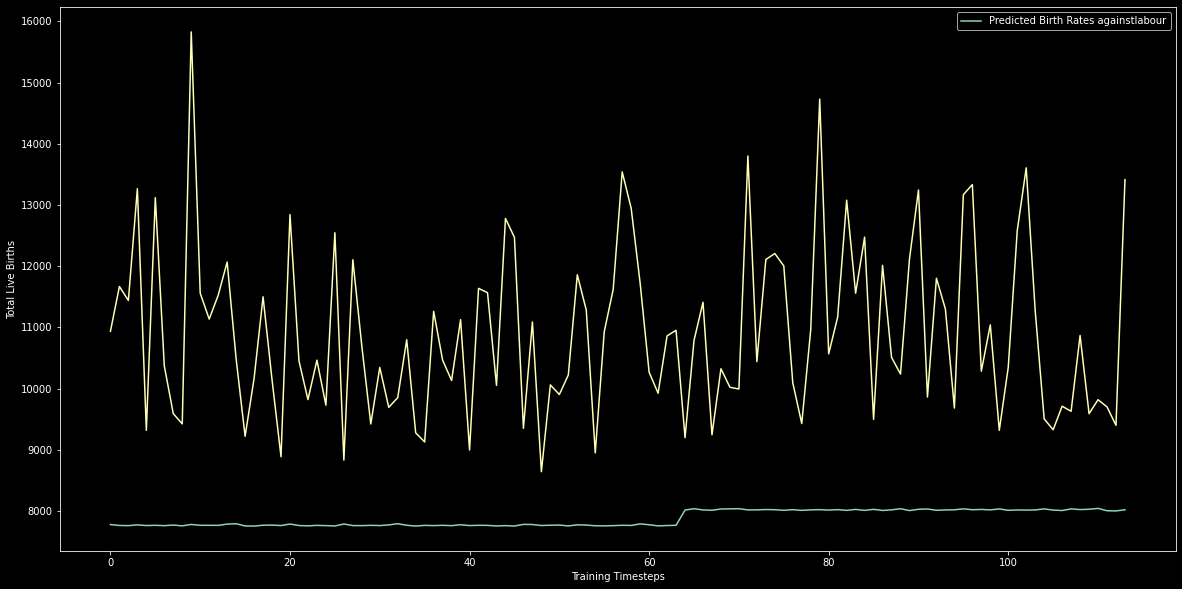

Iter:  0 train_loss:  0.4326842427253723 val_loss:  0.33031272888183594
Iter:  1 train_loss:  0.32380780577659607 val_loss:  0.24929094314575195
Iter:  2 train_loss:  0.21455207467079163 val_loss:  0.16400495171546936
Iter:  3 train_loss:  0.12389463931322098 val_loss:  0.08522823452949524
Iter:  4 train_loss:  0.11331899836659431 val_loss:  0.06764625012874603
Iter:  5 train_loss:  0.11667860671877861 val_loss:  0.06949719786643982
Iter:  6 train_loss:  0.08627261593937874 val_loss:  0.08230826258659363
Iter:  7 train_loss:  0.07806942239403725 val_loss:  0.09454582631587982
Iter:  8 train_loss:  0.07681607455015182 val_loss:  0.09876961261034012
Iter:  9 train_loss:  0.07649741694331169 val_loss:  0.095554880797863
Iter:  10 train_loss:  0.06930689141154289 val_loss:  0.08773040771484375
Iter:  11 train_loss:  0.06712320819497108 val_loss:  0.07918311655521393
Iter:  12 train_loss:  0.0610729344189167 val_loss:  0.07155035436153412
Iter:  13 train_loss:  0.05940222926437855 val_loss:

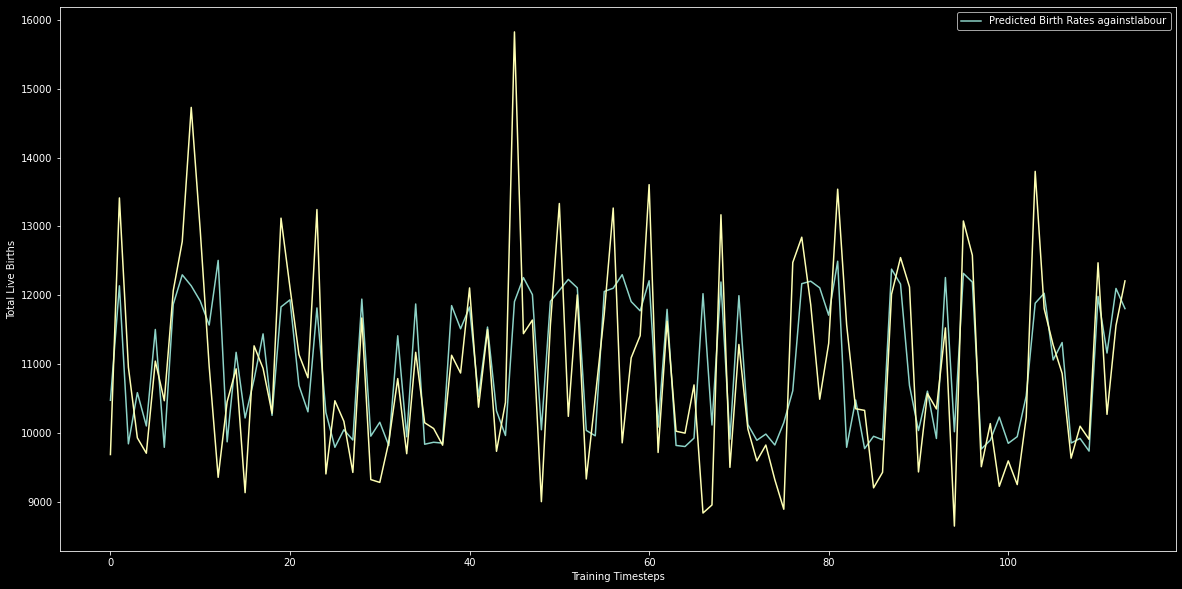

Iter:  20 train_loss:  0.0369079913944006 val_loss:  0.09391478449106216
Iter:  21 train_loss:  0.036320448853075504 val_loss:  0.10176447033882141
Iter:  22 train_loss:  0.03804007172584534 val_loss:  0.10857316851615906
Iter:  23 train_loss:  0.0368282962590456 val_loss:  0.11276859045028687
Iter:  24 train_loss:  0.03503009304404259 val_loss:  0.10653521120548248
Iter:  25 train_loss:  0.03590286336839199 val_loss:  0.10260885953903198
Iter:  26 train_loss:  0.03250513318926096 val_loss:  0.10103479772806168
Iter:  27 train_loss:  0.03136868495494127 val_loss:  0.10471102595329285
Iter:  28 train_loss:  0.030411740764975548 val_loss:  0.10294003039598465
Iter:  29 train_loss:  0.0291674779728055 val_loss:  0.09844046831130981
Iter:  30 train_loss:  0.028970071114599705 val_loss:  0.10077229887247086
Iter:  31 train_loss:  0.029758947901427746 val_loss:  0.10878836363554001
Iter:  32 train_loss:  0.027391805313527584 val_loss:  0.10673027485609055
Iter:  33 train_loss:  0.02735697571

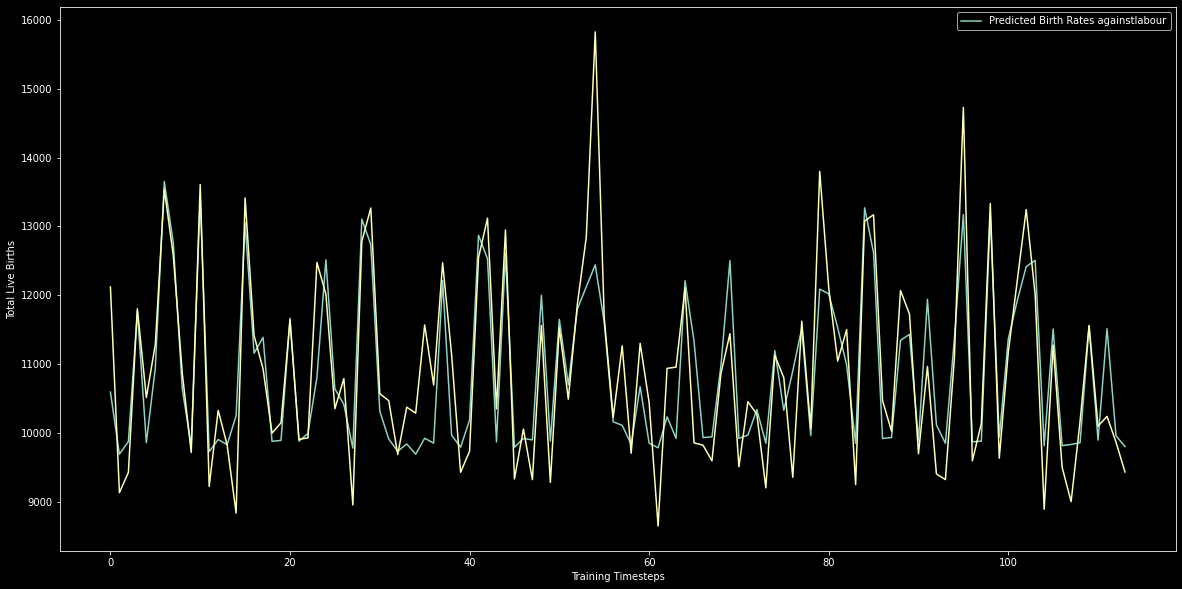

Iter:  40 train_loss:  0.01910972874611616 val_loss:  0.11489884555339813
Iter:  41 train_loss:  0.01800780463963747 val_loss:  0.11809831857681274
Iter:  42 train_loss:  0.016686394345015287 val_loss:  0.12258993089199066
Iter:  43 train_loss:  0.016391060315072536 val_loss:  0.12299682945013046
Iter:  44 train_loss:  0.01507803751155734 val_loss:  0.12346617877483368
Iter:  45 train_loss:  0.015390234999358654 val_loss:  0.11893022060394287
Iter:  46 train_loss:  0.01434416277334094 val_loss:  0.12410587817430496
Iter:  47 train_loss:  0.012912280857563019 val_loss:  0.12490104883909225
Iter:  48 train_loss:  0.012193614151328802 val_loss:  0.12360339611768723
Iter:  49 train_loss:  0.011538051068782806 val_loss:  0.13291284441947937
Iter:  50 train_loss:  0.011512461118400097 val_loss:  0.12323452532291412
Iter:  51 train_loss:  0.01106899930164218 val_loss:  0.1312805563211441
Iter:  52 train_loss:  0.01026224810630083 val_loss:  0.1284857541322708
Iter:  53 train_loss:  0.00963251

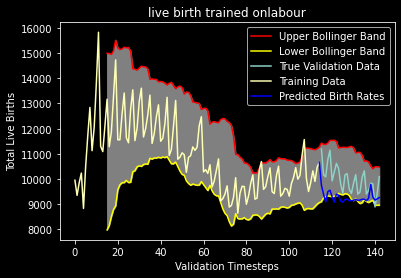

<Figure size 12000x12000 with 0 Axes>

In [30]:
endtoend(target, cols, raw_income, "labour")

In [5]:
gdp = pd.read_csv("./gdp.csv", header='infer', skiprows=10, skipfooter=18,engine='python', thousands=",").T
gdp = quarterify(gdp)
raw_gdp = birthmergify(gdp,ts)

/tmp/ipykernel_7798/1199900175.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  rawdf['quarter'] =rawdf['quarter'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')


In [6]:
## feature selection
target = list(raw_gdp)[1]
cols = list(raw_gdp)[9:26]
timelist = list(raw_gdp['time'])
print('Training set shape:{}'.format(raw_gdp.shape))
print('Length of Time Series: {}'.format(len(timelist)))
print('Feature targetted: {}'.format(target))
print('Featured selected: {}'.format(cols))
raw_gdp

Training set shape:(143, 26)
Length of Time Series: 143
Feature targetted: Total Live-Births
Featured selected: ['GDP In Chained (2015) Dollars', '  Goods Producing Industries', '    Manufacturing', '    Construction', '    Utilities', '    Other Goods Industries', '  Services Producing Industries', '    Wholesale & Retail Trade', '    Transportation & Storage', '    Accommodation & Food Services', '    Information & Communications', '    Finance & Insurance', '    Real Estate, Professional Services And Administrative & Support Services', '    Other Services Industries', '  Ownership Of Dwellings', '  Gross Value Added At Basic Prices', '  Add: Taxes On Products']


,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,time,GDP In Chained (2015) Dollars,...,Wholesale & Retail Trade,Transportation & Storage,Accommodation & Food Services,Information & Communications,Finance & Insurance,"Real Estate, Professional Services And Administrative & Support Services",Other Services Industries,Ownership Of Dwellings,Gross Value Added At Basic Prices,Add: Taxes On Products
0,1986-Q1,9954.0,4414.0,3553.0,1433.0,316.0,103.0,61.0,1986-01-01,15622.5,...,1509.7,1619.4,587.2,197.6,1247.8,2272.3,2206.2,1495.5,14267.2,1530.3
1,1986-Q2,9353.0,4186.0,3367.0,1271.0,332.0,87.0,50.0,1986-04-01,16075.7,...,1621.5,1674.2,577.6,202.7,1268.6,2072.4,2083.8,1545.5,14745.5,1406.9
2,1986-Q3,9854.0,4398.0,3475.0,1395.0,359.0,98.0,44.0,1986-07-01,16555.6,...,1666.5,1730.8,612.0,207.2,1335.5,2143.1,2172.9,1590.8,15150.1,1541.6
3,1986-Q4,10239.0,4782.0,3423.0,1454.0,351.0,98.0,51.0,1986-10-01,17070.8,...,1785.4,1730.9,639.8,215.8,1301.1,2602.8,2224.5,1601.3,15625.2,1580.4
4,1987-Q1,8834.0,4007.0,3053.0,1234.0,320.0,81.0,56.0,1987-01-01,16881.1,...,1542.1,1712.7,615.0,220.5,1453.5,2542.7,2407.4,1689.0,15425.5,1634.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2020-Q3,9836.0,4762.0,3330.0,1174.0,381.0,116.0,73.0,2020-07-01,113497.3,...,15948.1,5735.1,1892.1,5530.1,16119.4,14423.6,11615.6,5459.6,107016.2,6362.1
139,2020-Q4,9808.0,4722.0,3451.0,1133.0,323.0,117.0,62.0,2020-10-01,118906.7,...,17732.3,5917.4,1937.7,5744.4,16732.4,15480.0,12055.3,5429.7,111582.3,7318.7
140,2021-Q1,8894.0,4097.0,3220.0,1093.0,326.0,98.0,60.0,2021-01-01,119367.5,...,16514.9,6110.6,1844.1,5591.5,17075.9,14430.8,12398.2,5445.8,111902.1,7431.5
141,2021-Q2,9411.0,4298.0,3459.0,1140.0,339.0,112.0,63.0,2021-04-01,119660.0,...,16782.6,6099.3,1728.8,5736.4,17532.4,14689.1,11962.8,5491.7,112960.5,6538.1


mse:  10938774.0 mae:  2982.0718


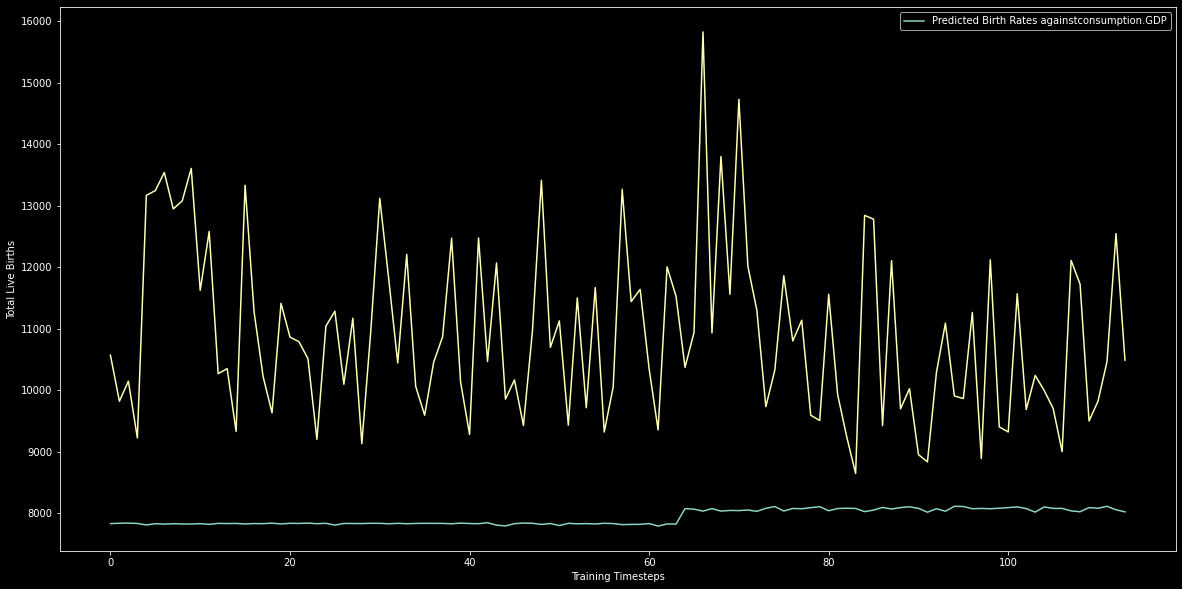

Iter:  0 train_loss:  0.418033629655838 val_loss:  0.3207753598690033
Iter:  1 train_loss:  0.3134111016988754 val_loss:  0.24378839135169983
Iter:  2 train_loss:  0.2143673300743103 val_loss:  0.15798674523830414
Iter:  3 train_loss:  0.13720257952809334 val_loss:  0.075552798807621
Iter:  4 train_loss:  0.10771320387721062 val_loss:  0.055091314017772675
Iter:  5 train_loss:  0.11432274803519249 val_loss:  0.054763734340667725
Iter:  6 train_loss:  0.0923832319676876 val_loss:  0.06456417590379715
Iter:  7 train_loss:  0.07680866494774818 val_loss:  0.0766957625746727
Iter:  8 train_loss:  0.07164090313017368 val_loss:  0.08295363187789917
Iter:  9 train_loss:  0.07130753062665462 val_loss:  0.08207016438245773
Iter:  10 train_loss:  0.07082939147949219 val_loss:  0.07616767287254333
Iter:  11 train_loss:  0.06503678113222122 val_loss:  0.06767858564853668
Iter:  12 train_loss:  0.06132561340928078 val_loss:  0.05911402031779289
Iter:  13 train_loss:  0.05863279476761818 val_loss:  0

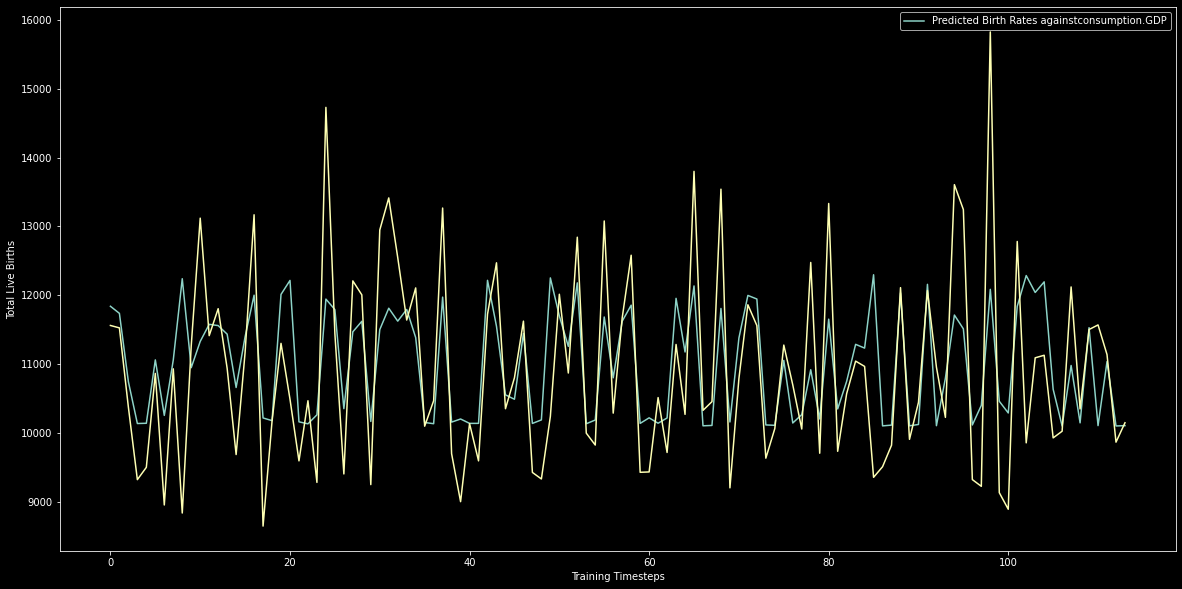

Iter:  20 train_loss:  0.04323878511786461 val_loss:  0.04972459748387337
Iter:  21 train_loss:  0.042272571474313736 val_loss:  0.05116140469908714
Iter:  22 train_loss:  0.040594009682536125 val_loss:  0.05285137891769409
Iter:  23 train_loss:  0.039535000920295715 val_loss:  0.0585637092590332
Iter:  24 train_loss:  0.03731619194149971 val_loss:  0.058427758514881134
Iter:  25 train_loss:  0.038138728588819504 val_loss:  0.053337015211582184
Iter:  26 train_loss:  0.036943716928362846 val_loss:  0.04772164300084114
Iter:  27 train_loss:  0.03524510841816664 val_loss:  0.049035169184207916
Iter:  28 train_loss:  0.03375123254954815 val_loss:  0.053933579474687576
Iter:  29 train_loss:  0.03637066949158907 val_loss:  0.0568382628262043
Iter:  30 train_loss:  0.034450347535312176 val_loss:  0.049599386751651764
Iter:  31 train_loss:  0.03194011654704809 val_loss:  0.04373063147068024
Iter:  32 train_loss:  0.03178425598889589 val_loss:  0.045824501663446426
Iter:  33 train_loss:  0.032

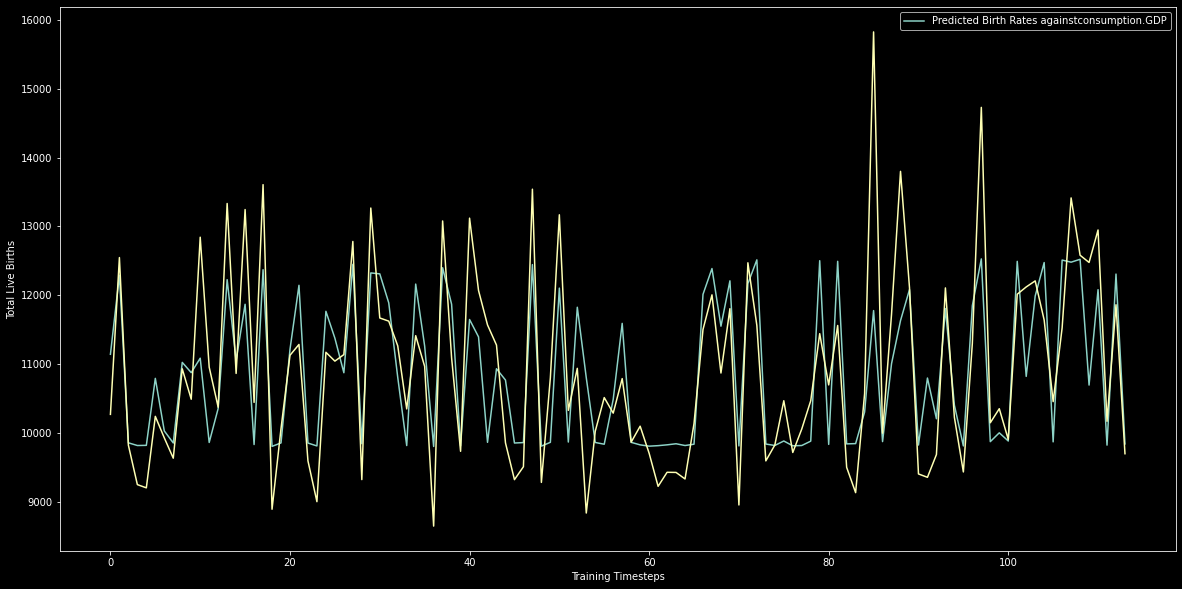

Iter:  40 train_loss:  0.02907508611679077 val_loss:  0.04963148757815361
Iter:  41 train_loss:  0.02796258870512247 val_loss:  0.045558806508779526
Iter:  42 train_loss:  0.028637603856623173 val_loss:  0.049289263784885406
Iter:  43 train_loss:  0.028896954841911793 val_loss:  0.05871078744530678
Iter:  44 train_loss:  0.027272770181298256 val_loss:  0.06015827879309654
Iter:  45 train_loss:  0.028209321200847626 val_loss:  0.055994339287281036
Iter:  46 train_loss:  0.026226991787552834 val_loss:  0.05135038495063782
Iter:  47 train_loss:  0.026488447561860085 val_loss:  0.05181512236595154
Iter:  48 train_loss:  0.026781393215060234 val_loss:  0.05753393471240997
Iter:  49 train_loss:  0.025708121247589588 val_loss:  0.06091552600264549
Iter:  50 train_loss:  0.02616580482572317 val_loss:  0.061114683747291565
Iter:  51 train_loss:  0.02624305710196495 val_loss:  0.05621219426393509
Iter:  52 train_loss:  0.025796477682888508 val_loss:  0.05334470048546791
Iter:  53 train_loss:  0.

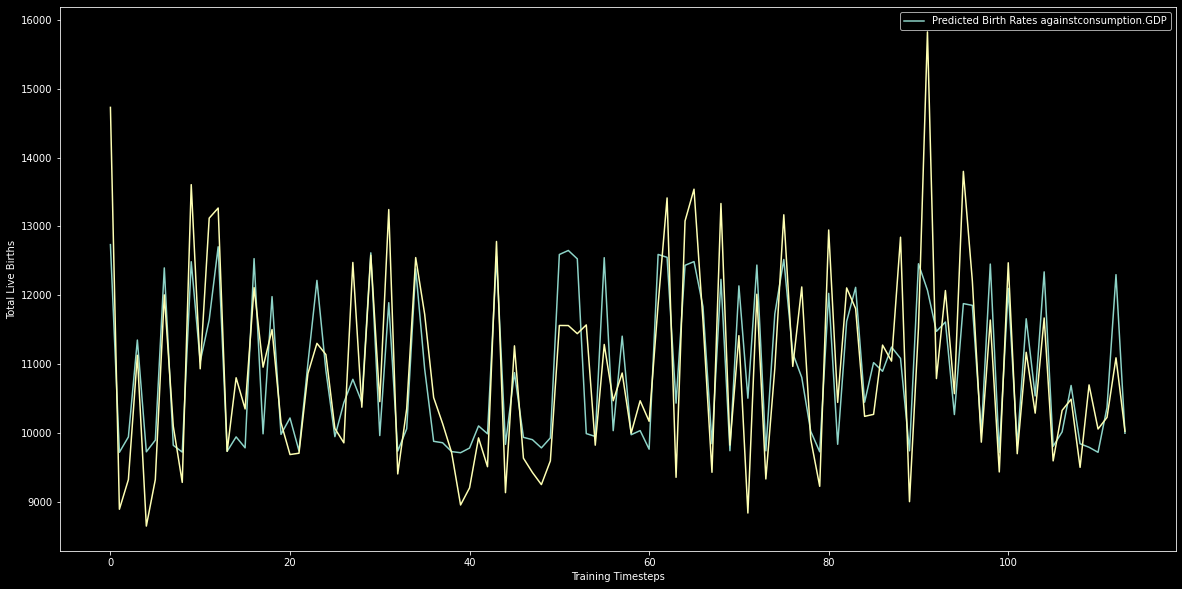

Iter:  60 train_loss:  0.025803551077842712 val_loss:  0.066807821393013
Iter:  61 train_loss:  0.024956325069069862 val_loss:  0.06365495920181274
Iter:  62 train_loss:  0.025767451152205467 val_loss:  0.05985133349895477
Iter:  63 train_loss:  0.024593951180577278 val_loss:  0.05643632635474205
Iter:  64 train_loss:  0.024720443412661552 val_loss:  0.06050921976566315
Iter:  65 train_loss:  0.02396910171955824 val_loss:  0.06690142303705215
Iter:  66 train_loss:  0.02415180392563343 val_loss:  0.06785470247268677
Iter:  67 train_loss:  0.023687717970460653 val_loss:  0.06218629330396652
Iter:  68 train_loss:  0.023985208943486214 val_loss:  0.06041934713721275
Iter:  69 train_loss:  0.025116379372775555 val_loss:  0.0627114325761795
Iter:  70 train_loss:  0.02395748905837536 val_loss:  0.06459760665893555
Iter:  71 train_loss:  0.02489766664803028 val_loss:  0.06537961214780807
Iter:  72 train_loss:  0.022954624146223068 val_loss:  0.061532944440841675
Iter:  73 train_loss:  0.023006

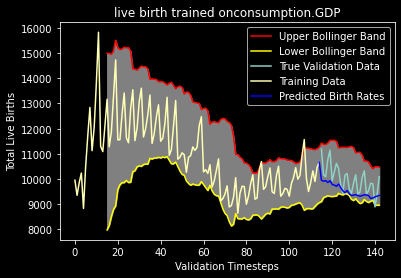

<Figure size 12000x12000 with 0 Axes>

In [7]:
endtoend(target, cols, raw_gdp, "consumption.GDP")

In [8]:
investment = pd.read_csv("./investment.csv", header='infer', skiprows=10, skipfooter=16,engine='python', thousands=",").T
raw_investment = birthmergify(quarterify(investment),ts)
## feature selection
def select_feature(raw_df, length):
    target = list(raw_df)[1]
    cols = list(raw_df)[9:length]
    timelist = list(raw_df['time'])
    print('Training set shape:{}'.format(raw_df.shape))
    print('Length of Time Series: {}'.format(len(timelist)))
    print('Feature targetted: {}'.format(target))
    print('Featured selected: {}'.format(cols))
    return target, cols

target, cols = select_feature(raw_investment,33)
raw_investment

Training set shape:(143, 33)
Length of Time Series: 143
Feature targetted: Total Live-Births
Featured selected: ['Gross Fixed Capital Formation', '  Construction & Works', '    Residential Buildings', '    Non-Residential Buildings', '    Other Construction & Works', '  Transport Equipment', '  Machinery & Equipment', '  Intellectual Property Products', 'Gross Fixed Capital Formation (Public Sector)', '  Construction & Works (Public Sector)', '    Residential Buildings (Public Sector)', '    Non-Residential Buildings (Public Sector)', '    Other Construction & Works (Public Sector)', '  Transport Equipment (Public Sector)', '  Machinery & Equipment (Public Sector)', '  Intellectual Property Products (Public Sector)', 'Gross Fixed Capital Formation (Private Sector) ', '  Construction & Works (Private Sector)', '    Residential Buildings (Private Sector) ', '    Non-Residential Buildings (Private Sector)', '    Other Construction & Works (Private Sector)', '  Transport Equipment (Private

/tmp/ipykernel_7798/1199900175.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  rawdf['quarter'] =rawdf['quarter'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')


,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,time,Gross Fixed Capital Formation,...,Machinery & Equipment (Public Sector),Intellectual Property Products (Public Sector),Gross Fixed Capital Formation (Private Sector),Construction & Works (Private Sector),Residential Buildings (Private Sector),Non-Residential Buildings (Private Sector),Other Construction & Works (Private Sector),Transport Equipment (Private Sector),Machinery & Equipment (Private Sector),Intellectual Property Products (Private Sector)
0,1986-Q1,9954.0,4414.0,3553.0,1433.0,316.0,103.0,61.0,1986-01-01,4834.1,...,122.9,39.9,3050.7,1601.7,924.7,681.5,17.7,901.0,575.7,147.1
1,1986-Q2,9353.0,4186.0,3367.0,1271.0,332.0,87.0,50.0,1986-04-01,4257.2,...,117.7,36.7,2297.7,1485.8,993.3,542.3,2.5,220.9,573.2,127.4
2,1986-Q3,9854.0,4398.0,3475.0,1395.0,359.0,98.0,44.0,1986-07-01,4808.7,...,112.5,37.5,2824.6,1233.0,815.6,453.6,5.1,762.5,661.5,129.9
3,1986-Q4,10239.0,4782.0,3423.0,1454.0,351.0,98.0,51.0,1986-10-01,4507.3,...,120.5,42.1,2500.8,1265.3,814.2,478.9,9.4,273.2,727.3,150.1
4,1987-Q1,8834.0,4007.0,3053.0,1234.0,320.0,81.0,56.0,1987-01-01,4579.8,...,129.9,45.5,2696.7,1101.3,707.6,421.9,3.9,771.0,623.6,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2020-Q3,9836.0,4762.0,3330.0,1174.0,381.0,116.0,73.0,2020-07-01,22669.8,...,245.1,559.8,19323.3,4558.4,2367.2,1938.1,248.2,1978.4,5630.5,7060.5
139,2020-Q4,9808.0,4722.0,3451.0,1133.0,323.0,117.0,62.0,2020-10-01,28491.6,...,258.8,552.0,23867.1,6861.6,3514.9,2996.2,348.4,3648.6,6411.4,6904.5
140,2021-Q1,8894.0,4097.0,3220.0,1093.0,326.0,98.0,60.0,2021-01-01,27657.9,...,626.7,542.5,22109.5,7000.5,3573.3,2967.4,460.3,2099.6,5873.8,7123.2
141,2021-Q2,9411.0,4298.0,3459.0,1140.0,339.0,112.0,63.0,2021-04-01,28474.4,...,408.2,564.3,23154.5,7197.5,3844.6,2875.7,465.8,1958.7,6625.6,7373.5


mse:  4753797.5 mae:  1689.8174


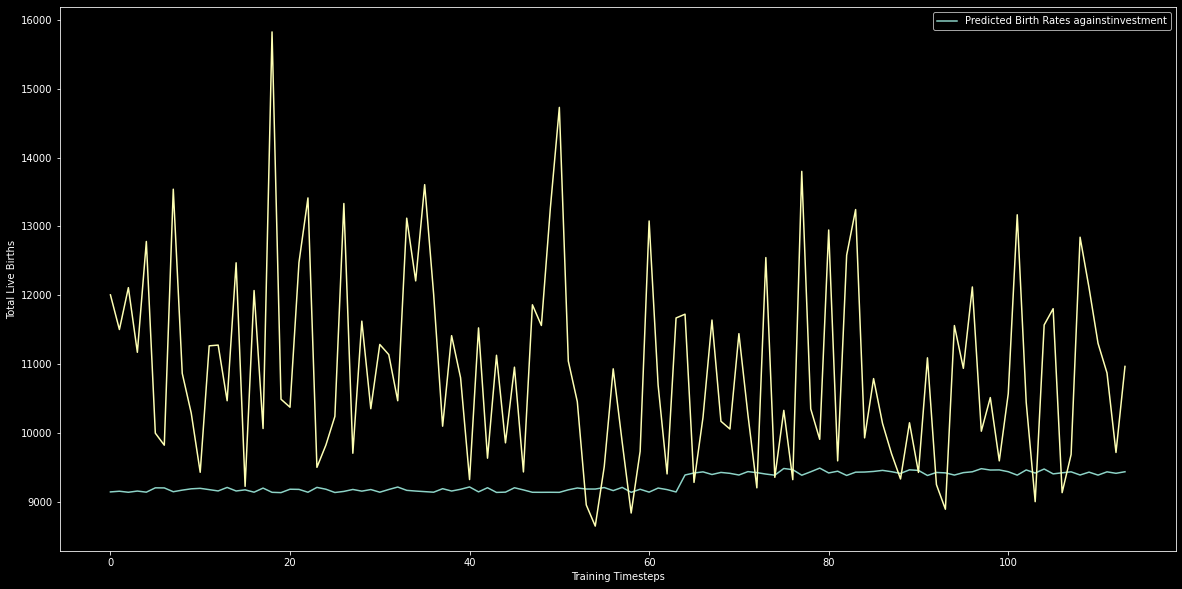

Iter:  0 train_loss:  0.1778404787182808 val_loss:  0.16007117927074432
Iter:  1 train_loss:  0.12845182418823242 val_loss:  0.11490731686353683
Iter:  2 train_loss:  0.09509114176034927 val_loss:  0.07546556740999222
Iter:  3 train_loss:  0.08795258775353432 val_loss:  0.05955573543906212
Iter:  4 train_loss:  0.0891503170132637 val_loss:  0.060590960085392
Iter:  5 train_loss:  0.0805736593902111 val_loss:  0.06822458654642105
Iter:  6 train_loss:  0.07705105096101761 val_loss:  0.0773976519703865
Iter:  7 train_loss:  0.07099764235317707 val_loss:  0.08451157808303833
Iter:  8 train_loss:  0.07293892651796341 val_loss:  0.08971747010946274
Iter:  9 train_loss:  0.06886725500226021 val_loss:  0.09204890578985214
Iter:  10 train_loss:  0.06644032150506973 val_loss:  0.09515338391065598
Iter:  11 train_loss:  0.06190670654177666 val_loss:  0.09849041700363159
Iter:  12 train_loss:  0.05553210526704788 val_loss:  0.09884507209062576
Iter:  13 train_loss:  0.051094360649585724 val_loss: 

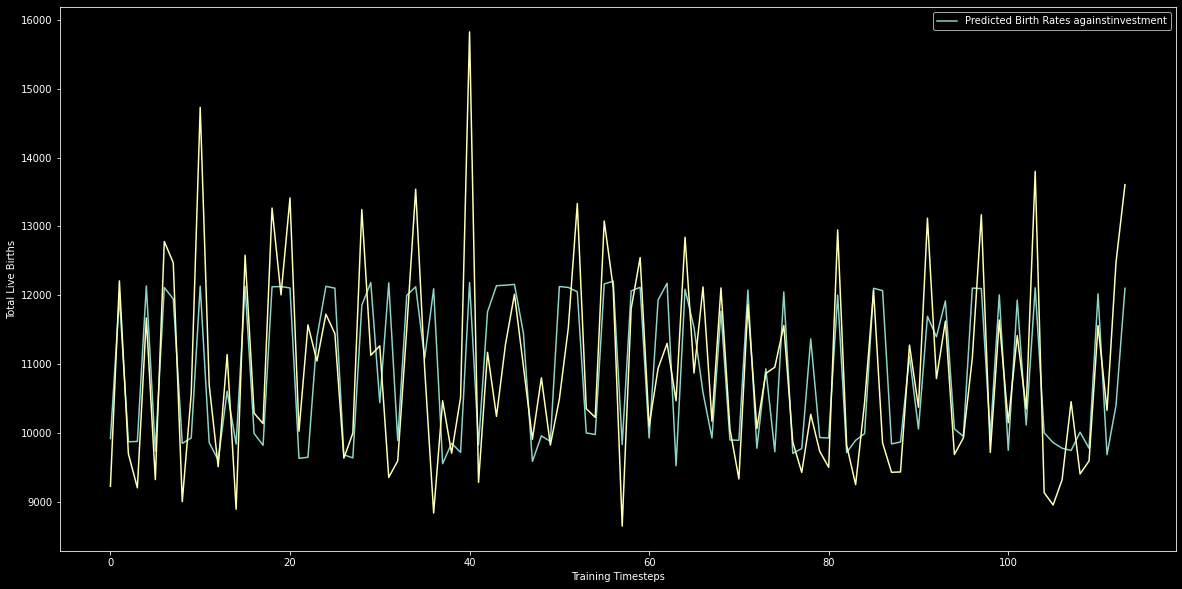

Iter:  20 train_loss:  0.035499462857842445 val_loss:  0.08825993537902832
Iter:  21 train_loss:  0.03583608195185661 val_loss:  0.07975813746452332
Iter:  22 train_loss:  0.03747580759227276 val_loss:  0.08977297693490982
Iter:  23 train_loss:  0.03558951895684004 val_loss:  0.09900496155023575
Iter:  24 train_loss:  0.03630171716213226 val_loss:  0.09070183336734772
Iter:  25 train_loss:  0.03447895310819149 val_loss:  0.07499033957719803
Iter:  26 train_loss:  0.03606683015823364 val_loss:  0.07376256585121155
Iter:  27 train_loss:  0.035106781870126724 val_loss:  0.09050697833299637
Iter:  28 train_loss:  0.034908294677734375 val_loss:  0.09300940483808517
Iter:  29 train_loss:  0.0329412491992116 val_loss:  0.08293390274047852
Iter:  30 train_loss:  0.03366805613040924 val_loss:  0.0731048732995987
Iter:  31 train_loss:  0.03370052482932806 val_loss:  0.07977958023548126
Iter:  32 train_loss:  0.03121540043503046 val_loss:  0.08691400289535522
Iter:  33 train_loss:  0.031497311778

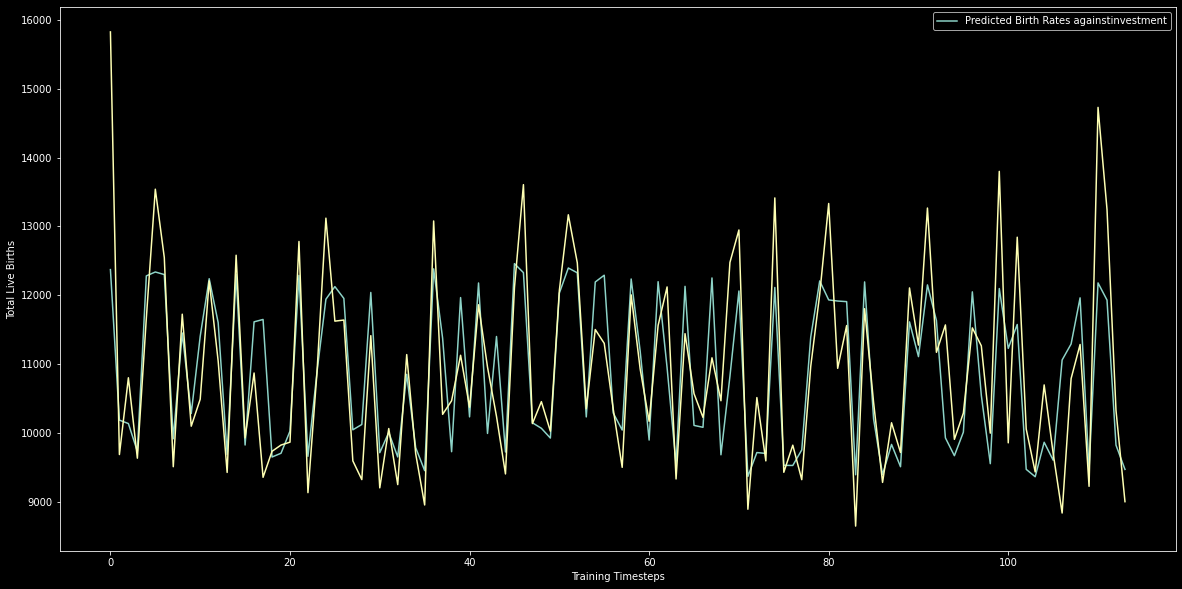

Iter:  40 train_loss:  0.027279416099190712 val_loss:  0.09040245413780212
Iter:  41 train_loss:  0.025390014052391052 val_loss:  0.06752676516771317
Iter:  42 train_loss:  0.024857092648744583 val_loss:  0.0794694796204567
Iter:  43 train_loss:  0.023695070296525955 val_loss:  0.08467654138803482
Iter:  44 train_loss:  0.021270294673740864 val_loss:  0.06865048408508301
Iter:  45 train_loss:  0.02200475614517927 val_loss:  0.09054821729660034
Iter:  46 train_loss:  0.022786451037973166 val_loss:  0.08262767642736435
Mean Square Error: 0.070547484 | Mean Absolute Error: 0.20888793


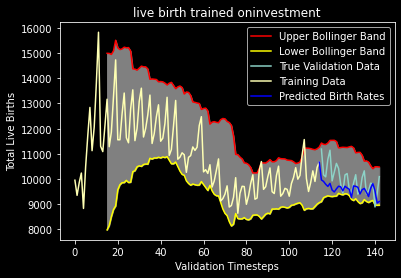

<Figure size 12000x12000 with 0 Axes>

In [9]:
endtoend(target, cols, raw_investment, "investment")

In [10]:
taxes = pd.read_csv("./taxes_industry.csv", header='infer', skiprows=10, skipfooter=16,engine='python', thousands=",").T
raw_taxes = birthmergify(quarterify(taxes),ts)
## feature selection
def select_feature(raw_df, length):
    target = list(raw_df)[1]
    cols = list(raw_df)[9:length]
    timelist = list(raw_df['time'])
    print('Training set shape:{}'.format(raw_df.shape))
    print('Length of Time Series: {}'.format(len(timelist)))
    print('Feature targetted: {}'.format(target))
    print('Featured selected: {}'.format(cols))
    return target, cols

target, cols = select_feature(raw_taxes,20)
raw_taxes

Training set shape:(143, 20)
Length of Time Series: 143
Feature targetted: Total Live-Births
Featured selected: ['Total', '  Manufacturing', '  Construction', '  Utilities', '  Other Goods Industries', '  Wholesale & Retail Trade', '  Transportation & Storage', '  Accommodation & Food Services', '  Information & Communications', '  Finance & Insurance', '  Real Estate, Professional Services And Administrative & Support Services']


/tmp/ipykernel_7798/1199900175.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  rawdf['quarter'] =rawdf['quarter'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')


,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,time,Total,Manufacturing,Construction,Utilities,Other Goods Industries,Wholesale & Retail Trade,Transportation & Storage,Accommodation & Food Services,Information & Communications,Finance & Insurance,"Real Estate, Professional Services And Administrative & Support Services"
0,1986-Q1,9954.0,4414.0,3553.0,1433.0,316.0,103.0,61.0,1986-01-01,392.2,38.5,50.9,10.3,6.5,29.1,88.7,9.3,3.1,14.6,94.7
1,1986-Q2,9353.0,4186.0,3367.0,1271.0,332.0,87.0,50.0,1986-04-01,256.0,26.9,32.4,9.4,2.5,18.2,29.7,7.4,2.4,12.8,72.9
2,1986-Q3,9854.0,4398.0,3475.0,1395.0,359.0,98.0,44.0,1986-07-01,314.6,33.7,31.1,11.1,3.0,25.6,46.6,9.0,8.3,15.6,85.8
3,1986-Q4,10239.0,4782.0,3423.0,1454.0,351.0,98.0,51.0,1986-10-01,283.7,33.6,28.8,10.9,2.8,25.3,36.8,9.0,7.9,15.9,67.1
4,1987-Q1,8834.0,4007.0,3053.0,1234.0,320.0,81.0,56.0,1987-01-01,332.3,29.6,27.1,12.3,4.9,19.5,67.7,6.0,7.2,15.5,95.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2020-Q3,9836.0,4762.0,3330.0,1174.0,381.0,116.0,73.0,2020-07-01,-5789.6,-797.6,-974.3,17.7,-2.0,-931.9,-472.4,-436.3,-244.4,-504.7,-1034.4
139,2020-Q4,9808.0,4722.0,3451.0,1133.0,323.0,117.0,62.0,2020-10-01,-5034.1,-661.9,-480.3,-1.0,-1.3,-808.1,-405.8,-364.2,-277.6,-553.0,-1053.7
140,2021-Q1,8894.0,4097.0,3220.0,1093.0,326.0,98.0,60.0,2021-01-01,-631.8,-88.8,-8.5,76.7,0.4,-328.7,-143.2,-253.4,-80.7,-167.2,151.3
141,2021-Q2,9411.0,4298.0,3459.0,1140.0,339.0,112.0,63.0,2021-04-01,-1243.7,-146.2,62.0,31.1,0.3,-324.8,-235.7,-234.7,-36.6,-98.6,-179.7


mse:  10453613.0 mae:  2910.1301


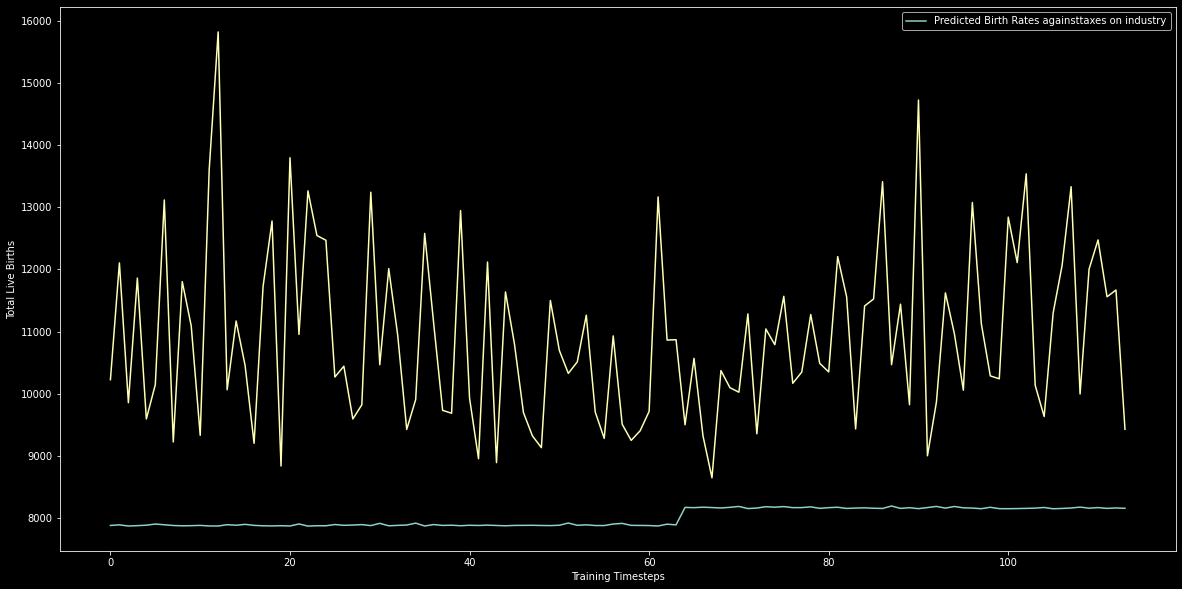

Iter:  0 train_loss:  0.40200531482696533 val_loss:  0.29971936345100403
Iter:  1 train_loss:  0.29046085476875305 val_loss:  0.20933331549167633
Iter:  2 train_loss:  0.1827096827328205 val_loss:  0.1190480887889862
Iter:  3 train_loss:  0.11086144670844078 val_loss:  0.05197001248598099
Iter:  4 train_loss:  0.08558908477425575 val_loss:  0.054648250341415405
Iter:  5 train_loss:  0.1129886731505394 val_loss:  0.04936284199357033
Iter:  6 train_loss:  0.09189433977007866 val_loss:  0.05342061445116997
Iter:  7 train_loss:  0.08098269253969193 val_loss:  0.07170456647872925
Iter:  8 train_loss:  0.07906396687030792 val_loss:  0.08512724190950394
Iter:  9 train_loss:  0.08315389975905418 val_loss:  0.08876127004623413
Iter:  10 train_loss:  0.07861709222197533 val_loss:  0.08570466190576553
Iter:  11 train_loss:  0.07649751007556915 val_loss:  0.07942594587802887
Iter:  12 train_loss:  0.07584778219461441 val_loss:  0.0723937600851059
Iter:  13 train_loss:  0.07313688099384308 val_loss

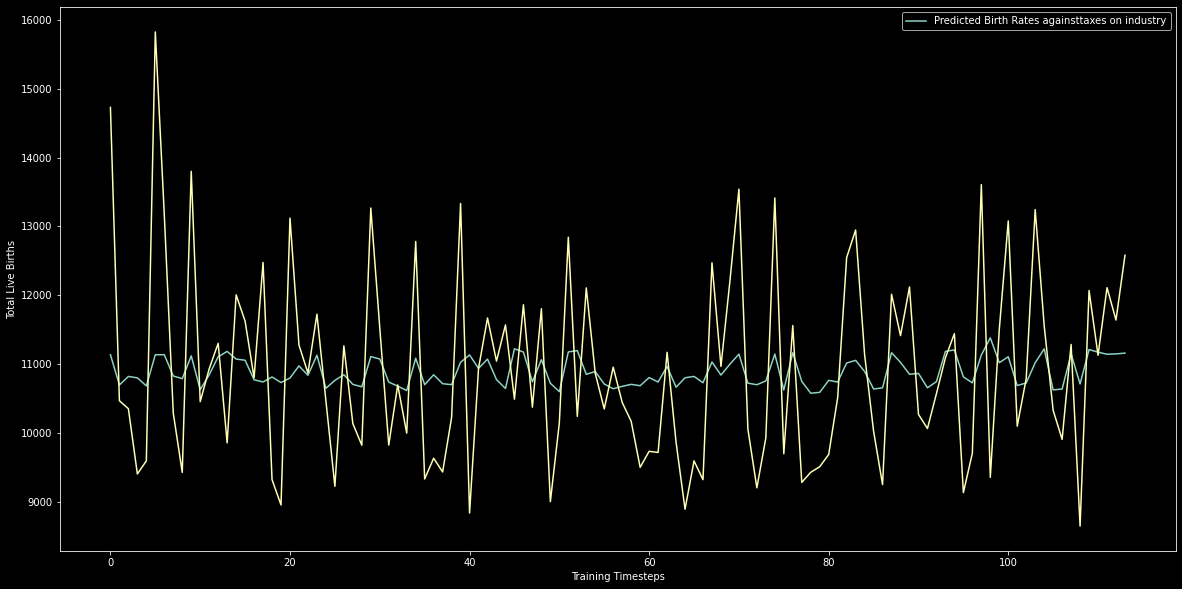

Iter:  20 train_loss:  0.06394120492041111 val_loss:  0.08211137354373932
Iter:  21 train_loss:  0.05929430574178696 val_loss:  0.07931123673915863
Iter:  22 train_loss:  0.05870901606976986 val_loss:  0.07744622975587845
Iter:  23 train_loss:  0.05526884272694588 val_loss:  0.08004050701856613
Iter:  24 train_loss:  0.05273972451686859 val_loss:  0.08662226796150208
Iter:  25 train_loss:  0.04659602977335453 val_loss:  0.09186519682407379
Iter:  26 train_loss:  0.04452529549598694 val_loss:  0.08323036134243011
Iter:  27 train_loss:  0.04142756760120392 val_loss:  0.08074091374874115
Iter:  28 train_loss:  0.04086494538933039 val_loss:  0.08278878778219223
Iter:  29 train_loss:  0.03750871494412422 val_loss:  0.0785762369632721
Iter:  30 train_loss:  0.03792006894946098 val_loss:  0.07852798700332642
Iter:  31 train_loss:  0.03683528117835522 val_loss:  0.0757390633225441
Iter:  32 train_loss:  0.03809294290840626 val_loss:  0.0641537755727768
Iter:  33 train_loss:  0.0364548973739147

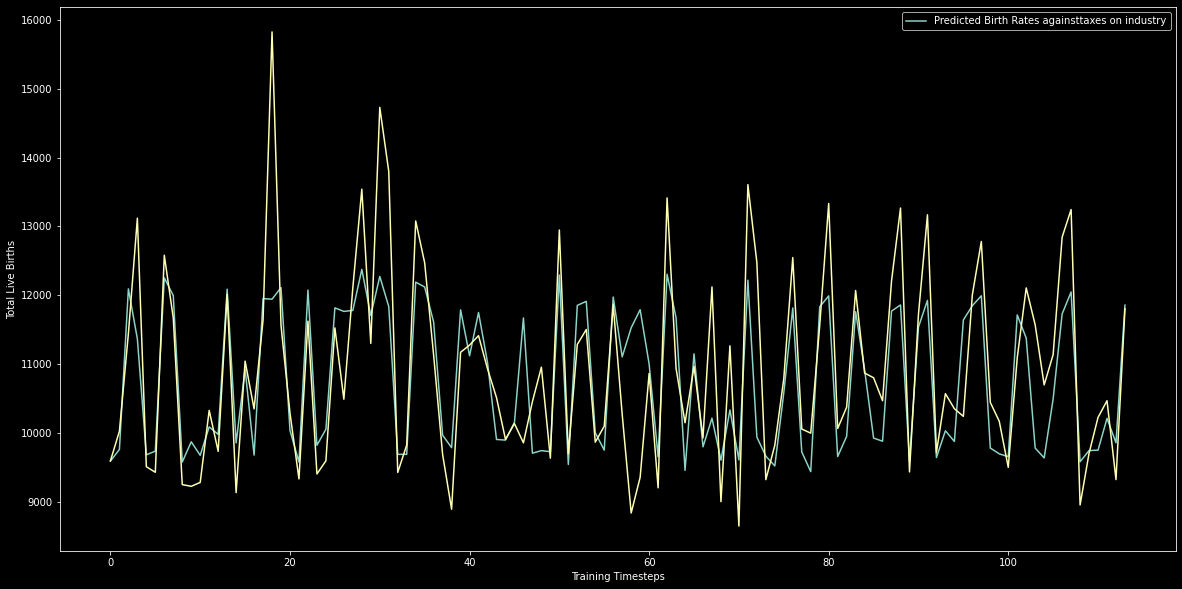

Iter:  40 train_loss:  0.032373649068176746 val_loss:  0.08083619922399521
Iter:  41 train_loss:  0.031049459241330624 val_loss:  0.05583156645298004
Iter:  42 train_loss:  0.030209717340767384 val_loss:  0.05976063013076782
Iter:  43 train_loss:  0.026768854819238186 val_loss:  0.07746993750333786
Iter:  44 train_loss:  0.02945539355278015 val_loss:  0.08250244706869125
Iter:  45 train_loss:  0.028476539067924023 val_loss:  0.06199450045824051
Iter:  46 train_loss:  0.027755826711654663 val_loss:  0.06657052785158157
Iter:  47 train_loss:  0.026243286207318306 val_loss:  0.07429841160774231
Iter:  48 train_loss:  0.025681967847049236 val_loss:  0.07192978262901306
Iter:  49 train_loss:  0.024518845602869987 val_loss:  0.06792902201414108
Iter:  50 train_loss:  0.02329172194004059 val_loss:  0.0739847719669342
Iter:  51 train_loss:  0.02217280026525259 val_loss:  0.08058712631464005
Iter:  52 train_loss:  0.023035485297441483 val_loss:  0.07787852734327316
Iter:  53 train_loss:  0.0213

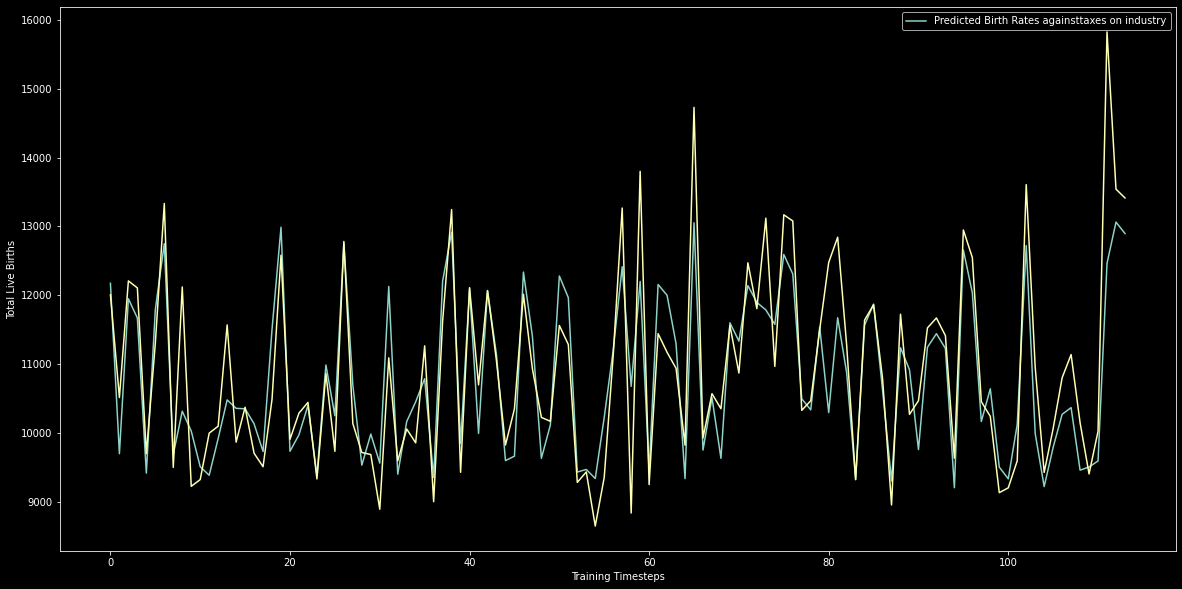

Iter:  60 train_loss:  0.019568024203181267 val_loss:  0.10529601573944092
Iter:  61 train_loss:  0.01785058667883277 val_loss:  0.08201313763856888
Iter:  62 train_loss:  0.01623449707403779 val_loss:  0.10305716097354889
Iter:  63 train_loss:  0.015205036383122206 val_loss:  0.10399952530860901
Iter:  64 train_loss:  0.015422502998262644 val_loss:  0.09159986674785614
Iter:  65 train_loss:  0.014082585461437702 val_loss:  0.10495290160179138
Iter:  66 train_loss:  0.013903417158871889 val_loss:  0.1067010834813118
Iter:  67 train_loss:  0.014488349668681622 val_loss:  0.10313991457223892
Iter:  68 train_loss:  0.013981100171804428 val_loss:  0.11287419497966766
Iter:  69 train_loss:  0.013185394927859306 val_loss:  0.11528320610523224
Iter:  70 train_loss:  0.012849123682826757 val_loss:  0.10821513086557388
Iter:  71 train_loss:  0.013647058513015509 val_loss:  0.11547081172466278
Iter:  72 train_loss:  0.012380879372358322 val_loss:  0.1103130355477333
Iter:  73 train_loss:  0.0119

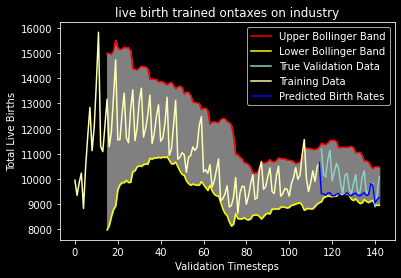

<Figure size 12000x12000 with 0 Axes>

In [11]:
endtoend(target, cols, raw_taxes, "taxes on industry")

In [12]:
bop = pd.read_csv("balance_of_payment.csv", header='infer', skiprows=10, skipfooter=38,engine='python', thousands=",").T
raw_bop = birthmergify(quarterify(bop),ts)
target, cols = select_feature(raw_bop, 45)


Training set shape:(143, 48)
Length of Time Series: 143
Feature targetted: Total Live-Births
Featured selected: ['D  Overall Balance (A-B+C)', '  A  Current Account Balance', '    Goods Balance', '      Exports Of Goods', '      Imports Of Goods', '    Services Balance', '      Exports Of Services', '         Exports Of Transport', '         Exports Of Travel', '         Exports Of Insurance', '         Exports Of Government Goods And Services', '         Exports Of Other Business Services', '      Imports Of Services', '        Imports Of Transport', '        Imports Of Travel', '        Imports Of Insurance', '        Imports Of Government Goods And Services', '        Imports Of Other Business Services', '    Primary Income Balance', '      Primary Income Receipts', '      Primary Income Payments', '    Secondary Income Balance', '  B  Capital & Financial Account Balance', '    Financial Account (Net)', '      Direct Investment', '      Portfolio Investment', '      Other Investment

/tmp/ipykernel_7798/1199900175.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  rawdf['quarter'] =rawdf['quarter'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')


mse:  4045978.8 mae:  1541.8721


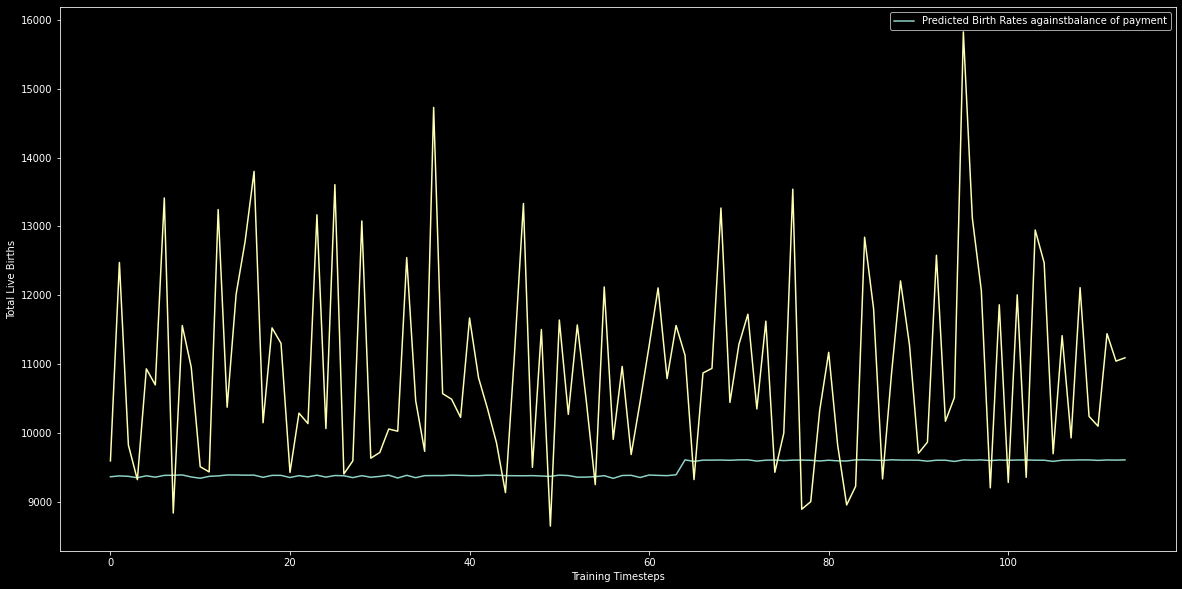

Iter:  0 train_loss:  0.15616698563098907 val_loss:  0.15083269774913788
Iter:  1 train_loss:  0.11616476252675056 val_loss:  0.12124013155698776
Iter:  2 train_loss:  0.09207125380635262 val_loss:  0.0987463966012001
Iter:  3 train_loss:  0.08130593970417976 val_loss:  0.08141624182462692
Iter:  4 train_loss:  0.075247373431921 val_loss:  0.07081938534975052
Iter:  5 train_loss:  0.07433215528726578 val_loss:  0.06722325086593628
Iter:  6 train_loss:  0.07596414163708687 val_loss:  0.06883491575717926
Iter:  7 train_loss:  0.07326160743832588 val_loss:  0.07294947654008865
Iter:  8 train_loss:  0.07086363434791565 val_loss:  0.07707217335700989
Iter:  9 train_loss:  0.06273983791470528 val_loss:  0.08163946866989136
Iter:  10 train_loss:  0.05416390113532543 val_loss:  0.09057435393333435
Iter:  11 train_loss:  0.04821113683283329 val_loss:  0.1036728173494339
Iter:  12 train_loss:  0.04216192848980427 val_loss:  0.11481527239084244
Iter:  13 train_loss:  0.041952406987547874 val_loss

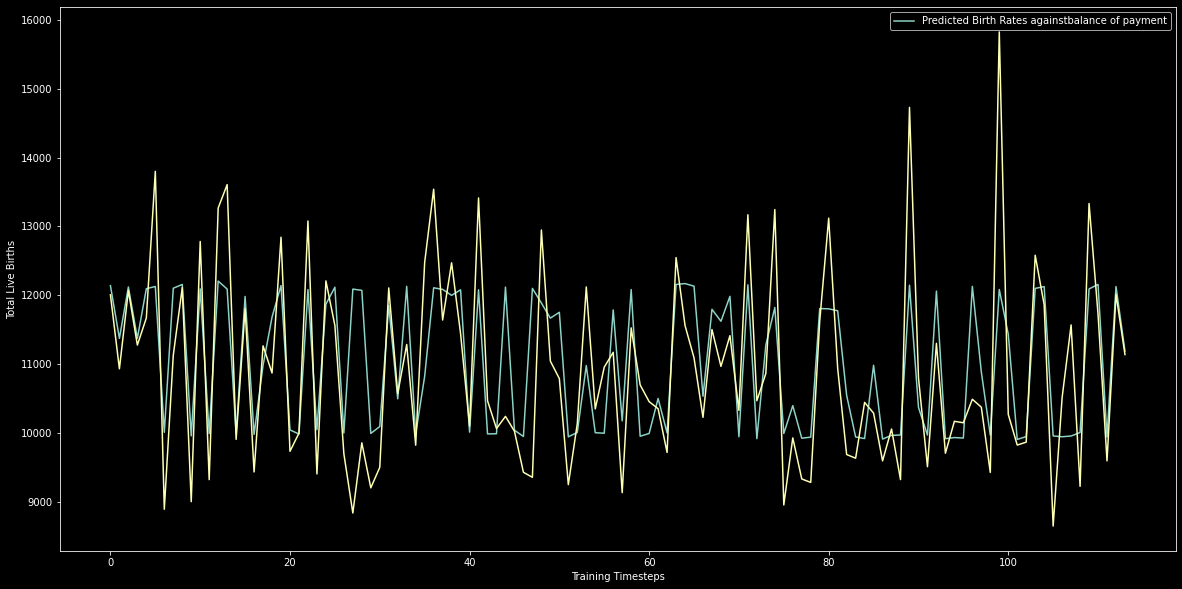

Iter:  20 train_loss:  0.03583388589322567 val_loss:  0.11665913462638855
Iter:  21 train_loss:  0.03436677437275648 val_loss:  0.1269274801015854
Iter:  22 train_loss:  0.03469618130475283 val_loss:  0.1335996389389038
Iter:  23 train_loss:  0.03654890041798353 val_loss:  0.12615686655044556
Iter:  24 train_loss:  0.03299012687057257 val_loss:  0.11226131021976471
Iter:  25 train_loss:  0.03597959503531456 val_loss:  0.10508908331394196
Iter:  26 train_loss:  0.03560506924986839 val_loss:  0.12272772192955017
Iter:  27 train_loss:  0.03393561393022537 val_loss:  0.1264515221118927
Iter:  28 train_loss:  0.03377297334372997 val_loss:  0.12508220970630646
Iter:  29 train_loss:  0.03289107605814934 val_loss:  0.11363724619150162
Iter:  30 train_loss:  0.032078647054731846 val_loss:  0.11888496577739716
Iter:  31 train_loss:  0.032210128381848335 val_loss:  0.1223035603761673
Iter:  32 train_loss:  0.03218297101557255 val_loss:  0.11759725213050842
Iter:  33 train_loss:  0.031557243317365

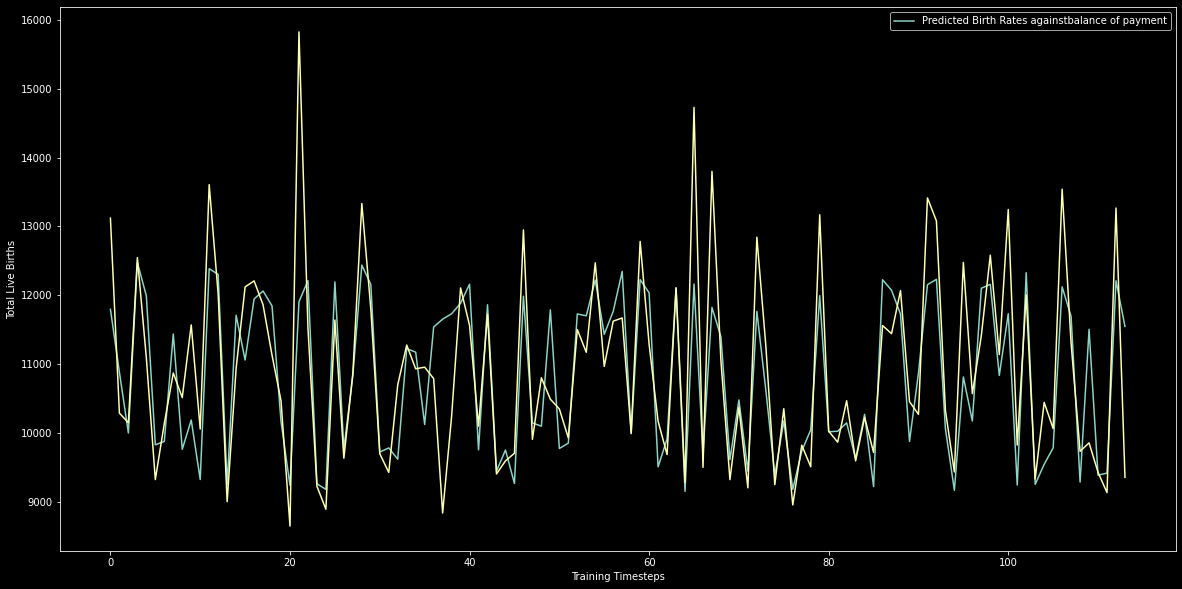

Iter:  40 train_loss:  0.028820153325796127 val_loss:  0.11402743309736252
Iter:  41 train_loss:  0.028409022837877274 val_loss:  0.09390106797218323
Iter:  42 train_loss:  0.028005169704556465 val_loss:  0.09369450807571411
Iter:  43 train_loss:  0.028162009082734585 val_loss:  0.10705536603927612
Iter:  44 train_loss:  0.028930990025401115 val_loss:  0.09522547572851181
Iter:  45 train_loss:  0.027581064961850643 val_loss:  0.08112611621618271
Iter:  46 train_loss:  0.025609578005969524 val_loss:  0.10466940701007843
Iter:  47 train_loss:  0.025263666175305843 val_loss:  0.10411781817674637
Iter:  48 train_loss:  0.02501258160918951 val_loss:  0.0886436477303505
Mean Square Error: 0.08790738 | Mean Absolute Error: 0.23920277


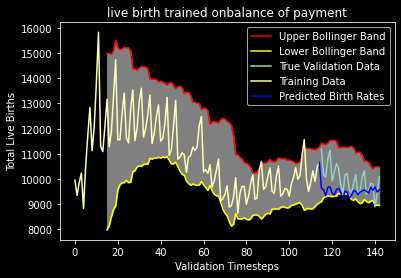

<Figure size 12000x12000 with 0 Axes>

In [13]:
endtoend(target, cols, raw_bop, "balance of payment")